<h1><center><font color=blue>Introduction to Statistical Machine Learning</font></center></h1>
<h1><center><font color=black>Part I: Descriptive Analysis</font></center></h1>
<h1><center><font color=black>By: Tanvi Shroff & Ayush Singla</font></center></h1>

### Please note: We created two accounts on kaggle for individual submissions and therefore, please ignore submission by username 'Asing989' and pick final submission named as 'Tanvi Ayush'

In [187]:
#importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as colors

In [188]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [451]:
pip install --upgrade pyproj


Note: you may need to restart the kernel to use updated packages.


In [189]:
#reading training dataset
data=pd.read_csv("training_data.csv")

In [190]:
data.shape

(3141, 144)

In [191]:
data.columns

Index(['county', 'cases', 'deaths', 'date_index_converted',
       'county_data_length', 'core_jaccard', 'core_cosine',
       'core_intersection', 'social_jaccard', 'politics_jaccard',
       ...
       'labor_force_rate', 'unemployment_rate', 'median_housing_cost',
       'median_household_earnings', 'median_worker_earnings',
       'percent_insured', 'percent_married', 'poverty_rate',
       'median_property_value', 'percent_white'],
      dtype='object', length=144)

In [192]:
data['county'].unique()

array(['Richland', 'Lawrence', 'Wayne', 'Fayette', 'Trumbull', 'Clinton',
       'Shelby', 'Tuscarawas', 'Champaign', 'Morrow', 'Butler', 'Clark',
       'Madison', 'Columbiana', 'Erie', 'Adams', 'Preble', 'Licking',
       'Marion', 'Mahoning', 'Portage', 'Greene', 'Sandusky', 'Hardin',
       'Auglaize', 'Noble', 'Mercer', 'Putnam', 'Lake', 'Hocking',
       'Brown', 'Ashland', 'Hancock', 'Jackson', 'Holmes', 'Fulton',
       'Paulding', 'Pike', 'Allen', 'Morgan', 'Geauga', 'Jefferson',
       'Harrison', 'Huron', 'Miami', 'Knox', 'Hamilton', 'Summit',
       'Darke', 'Franklin', 'Ross', 'Perry', 'Seneca', 'Lucas', 'Vinton',
       'Meigs', 'Fairfield', 'Pickaway', 'Delaware', 'Ottawa',
       'Washington', 'Athens', 'Cuyahoga', 'Medina', 'Monroe', 'Guernsey',
       'Coshocton', 'Carroll', 'Ashtabula', 'Van Wert', 'Montgomery',
       'Scioto', 'Belmont', 'Muskingum', 'Defiance', 'Union', 'Logan',
       'Highland', 'Henry', 'Wood', 'Clermont', 'Crawford', 'Warren',
       'Gallia',

# Part 1 : b

In [193]:
#df with all awareness topics
data_awareness_topics=data.iloc[:,5:131]

In [194]:
data_awareness_topics

,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,entertainment_jaccard,sports_jaccard,...,gender_intersection_normalized,religion_intersection_normalized,social_intersection_normalized,politics_republican_love_intersection_normalized,politics_intersection_normalized,entertainment_intersection_normalized,politics_republican_hate_intersection_normalized,politics_democratic_hate_intersection_normalized,health_intersection_normalized,illness_intersection_normalized
0,0.000000,0.000000,0.000000,0.000011,0.000151,0.000053,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.002755,0.011019,0.018282,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000123,0.000016,...,0.000000,0.000000,0.000000,0.015625,0.000000,0.085938,0.000000,0.0,0.0,0.000000
2,0.000076,0.000370,0.006502,0.000039,0.000000,0.000000,0.0,0.00000,0.000000,0.000005,...,0.000000,0.005852,0.009103,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.033362
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000480,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000046,0.000000,0.000000,0.0,0.00000,0.000088,0.000045,...,0.000000,0.000000,0.010830,0.000000,0.000000,0.061372,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,0.000094,0.000491,0.008169,0.000041,0.000011,0.000003,0.0,0.00001,0.000041,0.000009,...,0.011436,0.005146,0.009802,0.025486,0.001301,0.028427,0.002777,0.0,0.0,0.061195
3137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000103,0.000296,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.0,0.0,0.000000
3138,0.000013,0.000105,0.001076,0.000009,0.000012,0.000000,0.0,0.00000,0.000016,0.000009,...,0.000000,0.009688,0.002153,0.000000,0.001429,0.010764,0.000000,0.0,0.0,0.005523
3139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000058,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [195]:
data_awareness_topics.shape

(3141, 126)

In [196]:
#calculating mean of all awareness topics
data_awareness_topics_mean = data_awareness_topics.mean()

In [197]:
data_awareness_topics_mean

core_jaccard                                        0.000031
core_cosine                                         0.000188
core_intersection                                   0.002652
social_jaccard                                      0.000026
politics_jaccard                                    0.000018
                                                      ...   
entertainment_intersection_normalized               0.016326
politics_republican_hate_intersection_normalized    0.002337
politics_democratic_hate_intersection_normalized    0.002092
health_intersection_normalized                      0.000305
illness_intersection_normalized                     0.014423
Length: 126, dtype: float64

In [198]:
#converting series to df
data_awareness_topics_mean_df=data_awareness_topics_mean.to_frame()

In [199]:
#transposing the df 
data_awareness_topics_mean_df_T=data_awareness_topics_mean_df.T

In [200]:
data_awareness_topics_mean_df_T

,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,entertainment_jaccard,sports_jaccard,...,gender_intersection_normalized,religion_intersection_normalized,social_intersection_normalized,politics_republican_love_intersection_normalized,politics_intersection_normalized,entertainment_intersection_normalized,politics_republican_hate_intersection_normalized,politics_democratic_hate_intersection_normalized,health_intersection_normalized,illness_intersection_normalized
0,0.000031,0.000188,0.002652,0.000026,0.000018,0.000014,0.000013,0.000008,0.000023,0.000035,...,0.00372,0.00735,0.0062,0.004485,0.002161,0.016326,0.002337,0.002092,0.000305,0.014423


In [201]:
#extracting all jaccard normalized awareness topics
data_awareness_topics_jaccard=data_awareness_topics_mean_df_T.loc[:,data_awareness_topics_mean_df_T.columns.str.endswith('_jaccard_normalized')]
data_awareness_topics_jaccard

,core_jaccard_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,...,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized
0,0.013087,0.000874,0.004233,0.005675,0.016608,0.004278,0.002561,0.002408,0.005499,0.001536,...,0.003604,0.007208,0.006125,0.004496,0.002207,0.016255,0.002303,0.002108,0.000309,0.014464


In [202]:
#transposing the df 
data_awareness_topics_jaccard=data_awareness_topics_jaccard.T
#converting the column to a series 
data_awareness_topics_jaccard_series = data_awareness_topics_jaccard.iloc[:,0]

In [203]:
#sorting series in descending order
data_awareness_topics_jaccard_series_sorted=data_awareness_topics_jaccard_series.sort_values(ascending=False)

In [260]:
len(data_awareness_topics_jaccard_series_sorted)

21

In [258]:
o=data_awareness_topics_jaccard_series_sorted.mean()

In [259]:
o

0.00589412335273874

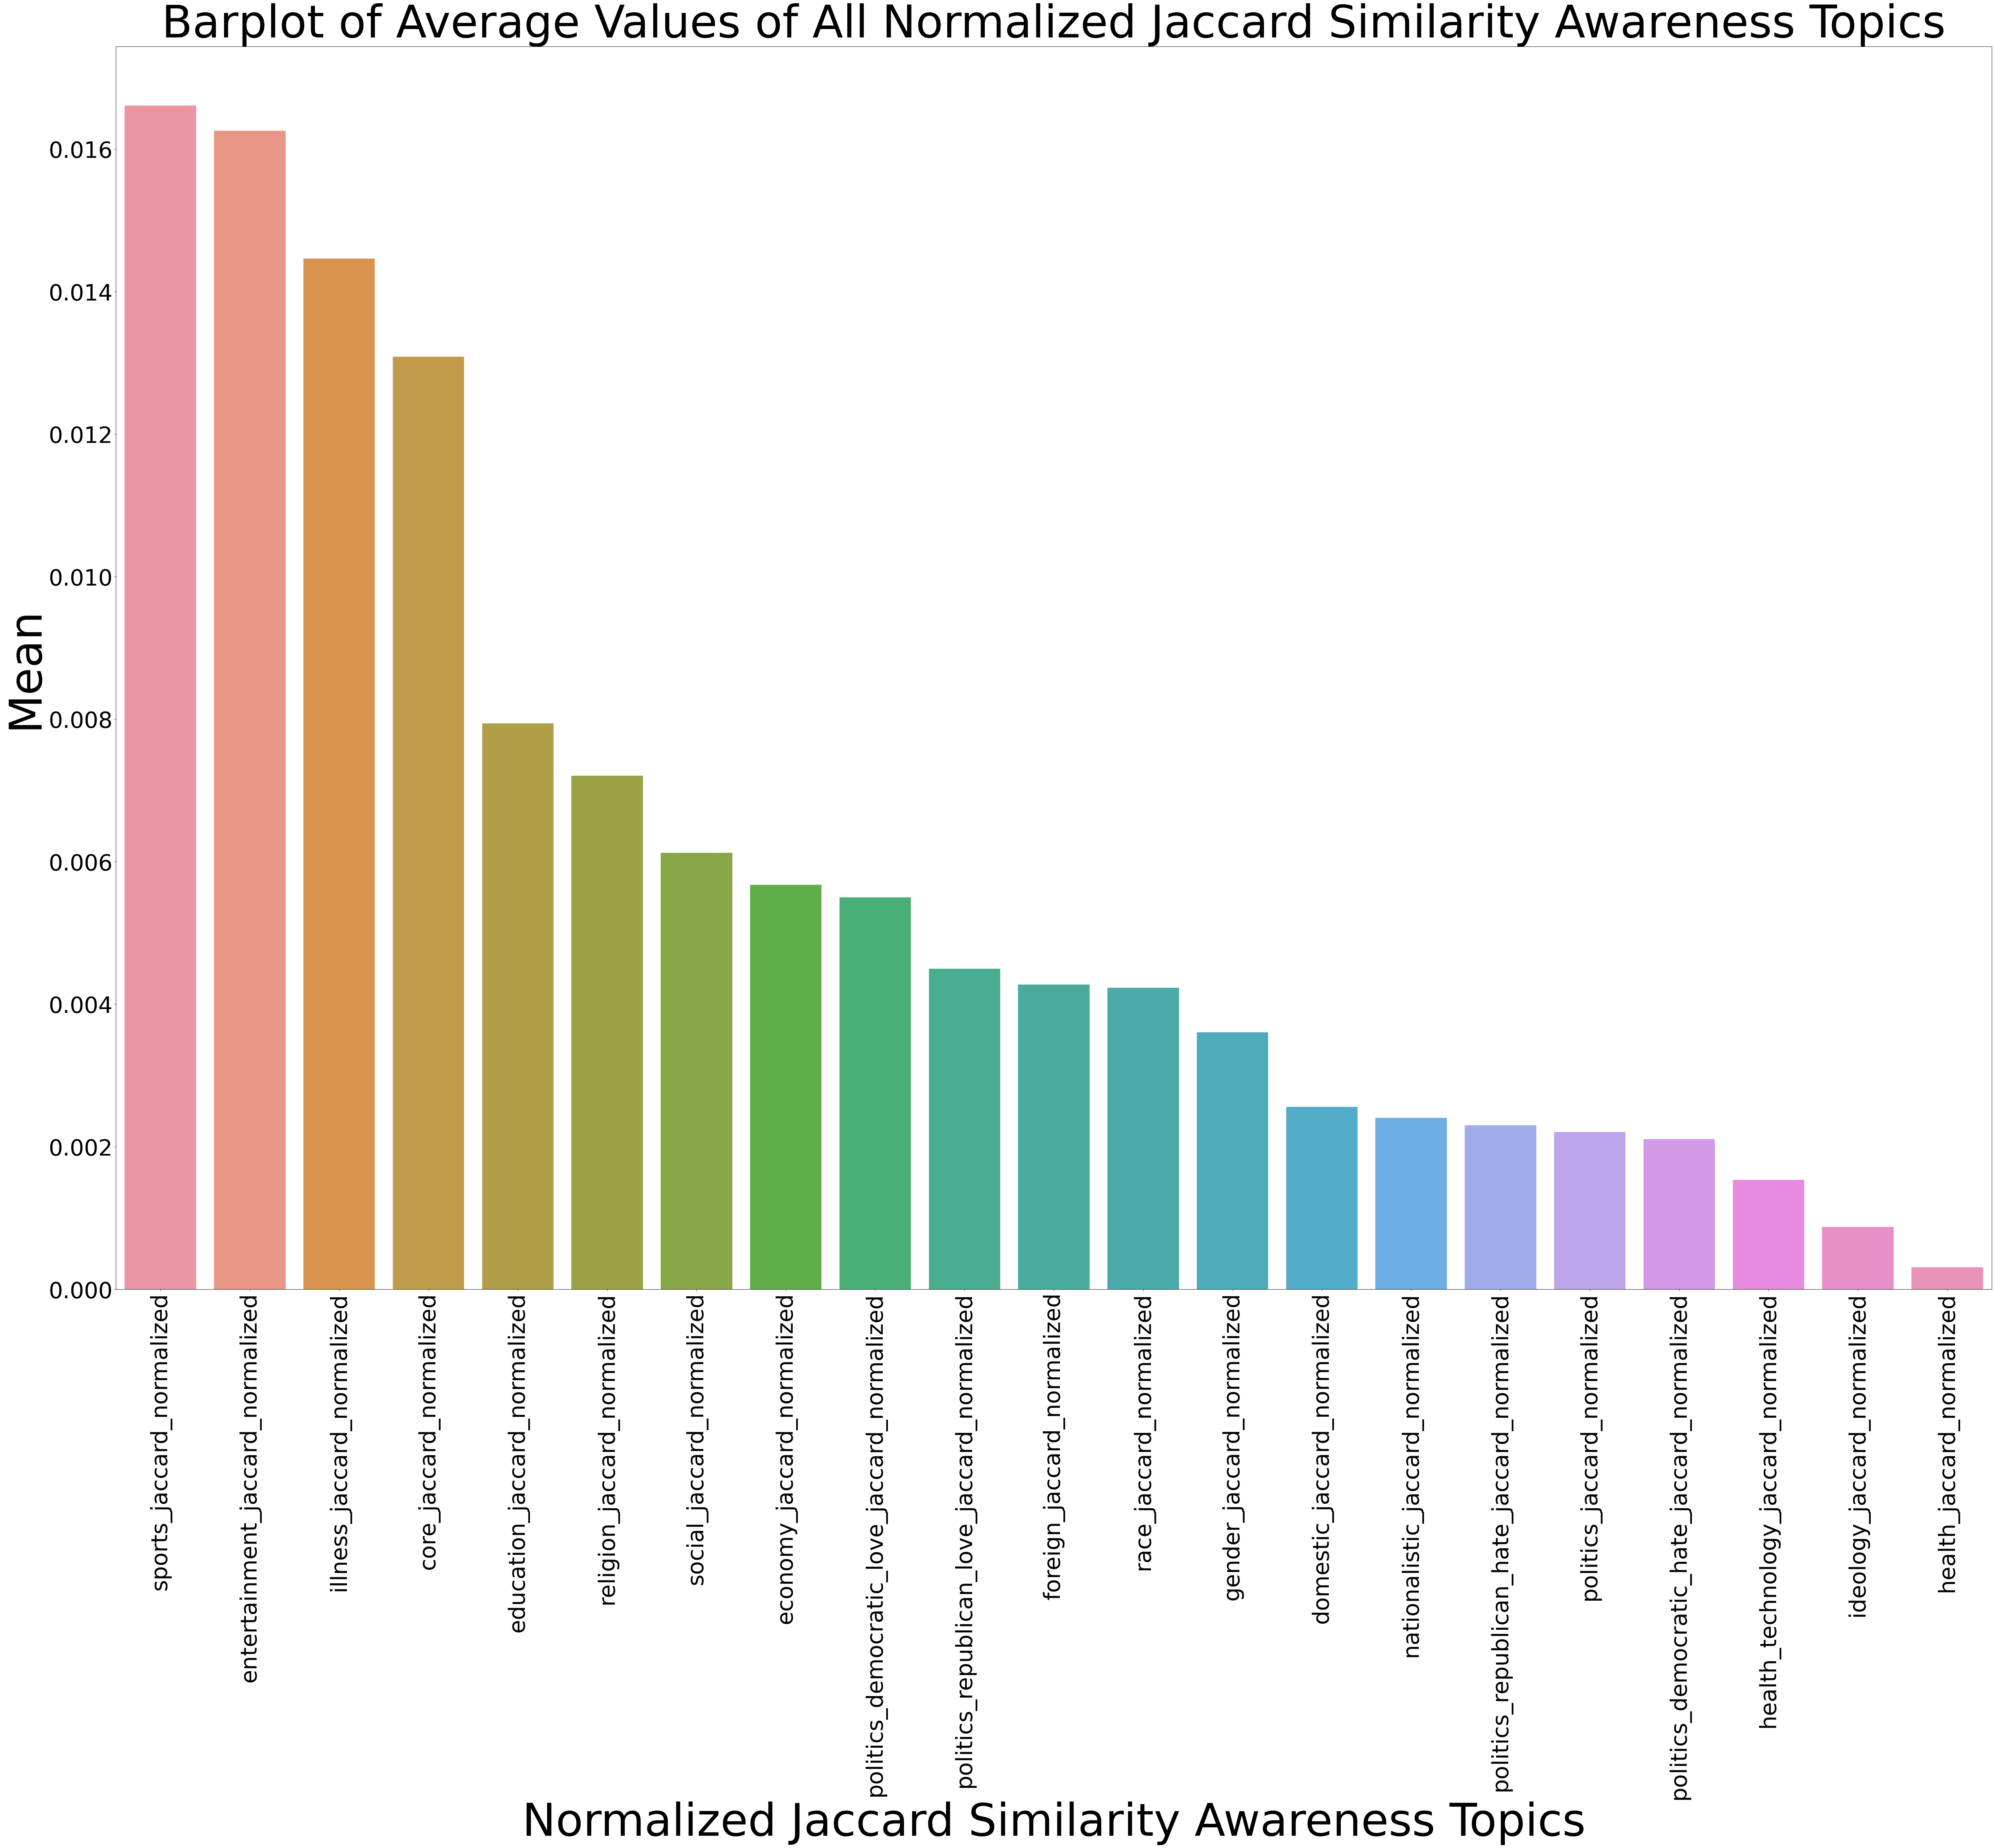

In [205]:
#code to plot a bar chart 
plt.figure(figsize=(75, 50))
sns.barplot(x=data_awareness_topics_jaccard_series_sorted.index, y=data_awareness_topics_jaccard_series_sorted.values)
plt.xlabel("Normalized Jaccard Similarity Awareness Topics",fontsize=100)
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel("Mean",fontsize=100)
plt.title("Barplot of Average Values of All Normalized Jaccard Similarity Awareness Topics",fontsize=100)
plt.show()

# Part 1 : c

In [206]:
#grouping data county wise for the core jaccard normalised awareness variable and calculating mean
data_county_core_jaccard_normalized=data.groupby('county')['core_jaccard_normalized'].mean()

In [207]:
#sorting in descending value
data_county_core_jaccard_normalized_sorted=data_county_core_jaccard_normalized.sort_values(ascending=False)
data_county_core_jaccard_normalized_sorted

county
Delaware     0.038117
Richland     0.036633
Perry        0.032577
Clermont     0.031629
Medina       0.028693
               ...   
Hocking      0.000000
Holmes       0.000000
Champaign    0.000000
Highland     0.000000
Paulding     0.000000
Name: core_jaccard_normalized, Length: 88, dtype: float64

In [208]:
data_county_core_jaccard_normalized_sorted

county
Delaware     0.038117
Richland     0.036633
Perry        0.032577
Clermont     0.031629
Medina       0.028693
               ...   
Hocking      0.000000
Holmes       0.000000
Champaign    0.000000
Highland     0.000000
Paulding     0.000000
Name: core_jaccard_normalized, Length: 88, dtype: float64

In [263]:
data_county_core_jaccard_normalized_sorted.to_csv("C:/Users/urvis/Desktop/xyz.csv")

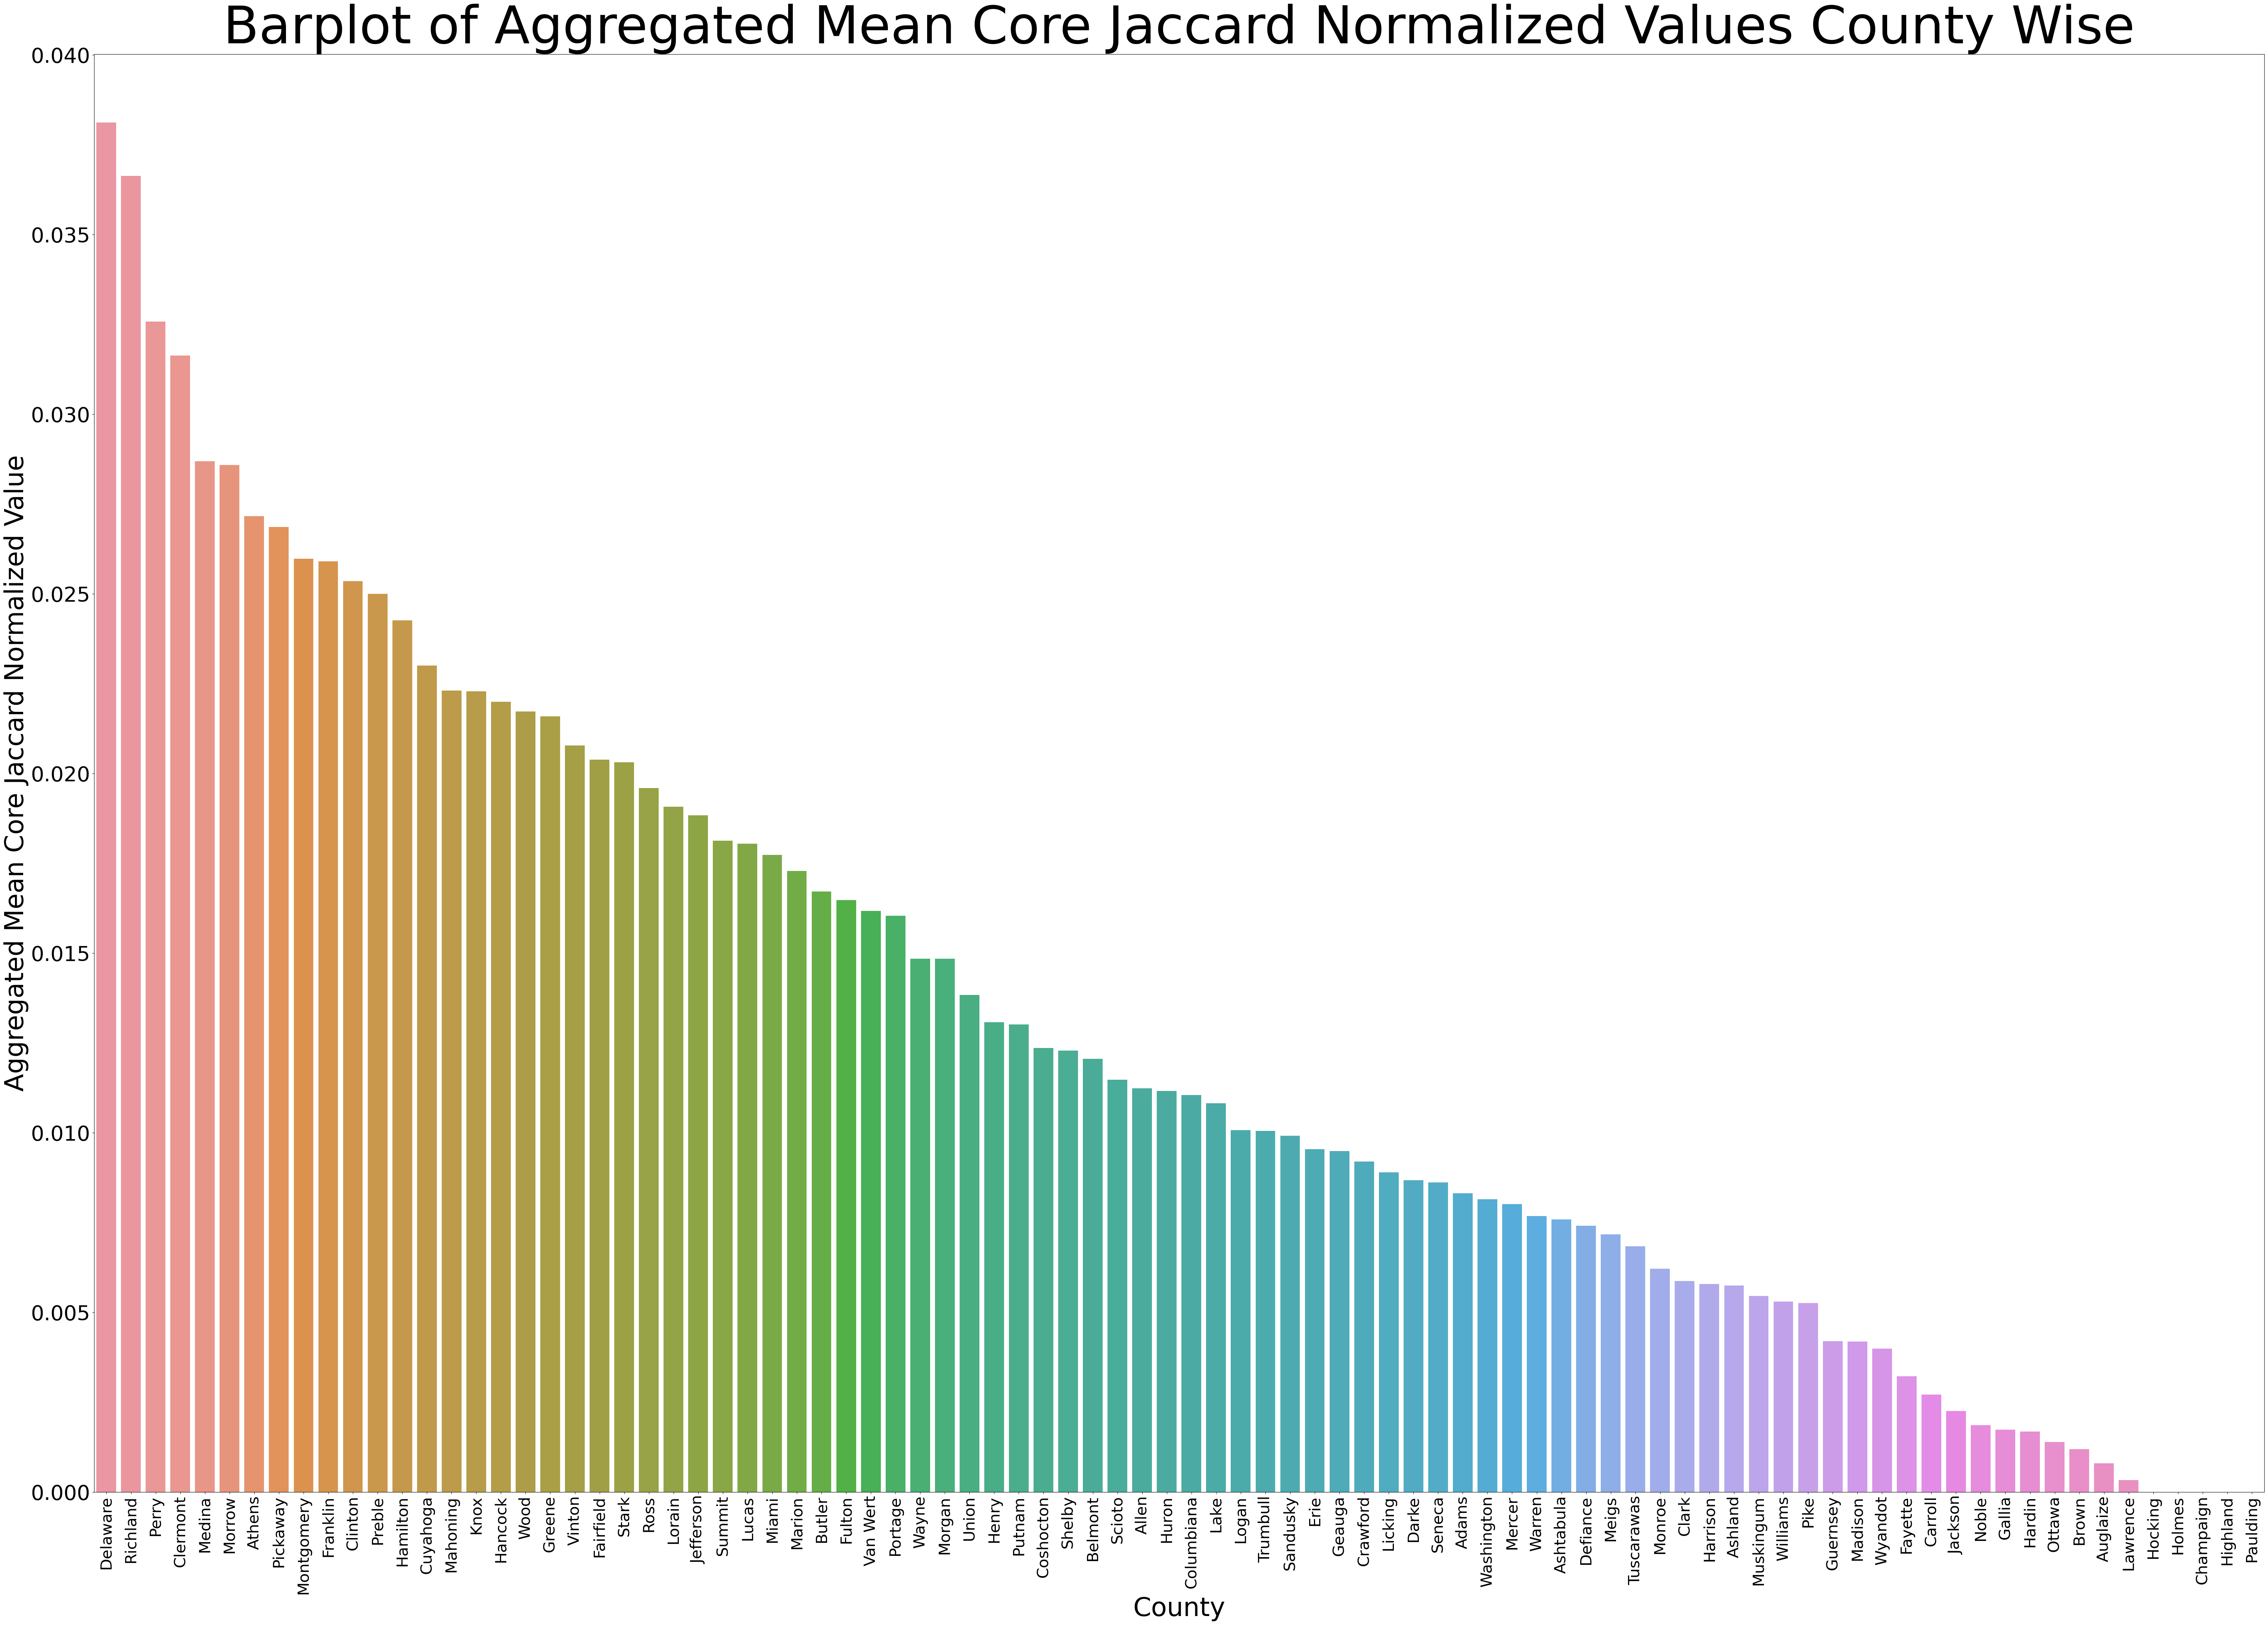

In [209]:
#code to plot bar chart 
plt.figure(figsize=(75, 50))
sns.barplot(x=data_county_core_jaccard_normalized_sorted.index, y=data_county_core_jaccard_normalized_sorted.values)
plt.xlabel("County",fontsize=50)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=40)
plt.ylabel("Aggregated Mean Core Jaccard Normalized Value",fontsize=50)
plt.title("Barplot of Aggregated Mean Core Jaccard Normalized Values County Wise",fontsize=100)
plt.show()

# Part 1: d

# Cases

In [210]:
#grouping data county wise and summing up the number of cases of every county
data_cases_county = data.groupby('county')['cases'].sum()

In [211]:
#converting to df
data_cases_county_df=data_cases_county.to_frame()

In [212]:
#data[["county","total_pop"]].drop_duplicates(keep="first")

In [213]:
#adding the county and tot_pop columsn to the above df by merging them
data_cases_county_df1=data_cases_county_df.merge(data[["county","total_pop"]].drop_duplicates(keep="first"),how="inner",on="county")

In [214]:
data_cases_county_df1.to_csv("C:/Users/urvis/Desktop/total_cases.csv")

In [215]:
#calculating casespercapita
data_cases_county_df1["cases_per_capita"]=data_cases_county_df1["cases"]/data_cases_county_df1["total_pop"]

In [216]:
data_cases_county_df1.describe()

,cases,total_pop,cases_per_capita
count,88.000000,8.800000e+01,88.000000
mean,5724.250000,1.315452e+05,0.036392
std,12551.921495,2.143787e+05,0.094847
min,21.000000,1.323400e+04,0.001491
25%,358.750000,3.722050e+04,0.009110
50%,1246.000000,5.772600e+04,0.020725
75%,3514.000000,1.239552e+05,0.035876
max,65513.000000,1.263189e+06,0.887587


In [217]:
#reading the json file in the gpd format
ohio_counties = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')

In [218]:
#extracting only counties which are in the State of Ohio whose State number is 39
ohio_counties = ohio_counties[ohio_counties['STATE'] == '39']

In [219]:
ohio_counties

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
404,39055,0500000US39055,39,055,Geauga,County,400.164,"POLYGON ((-81.00307 41.42593, -81.00319 41.424..."
405,39063,0500000US39063,39,063,Hancock,County,531.358,"POLYGON ((-83.42105 41.16678, -83.42032 40.991..."
406,39065,0500000US39065,39,065,Hardin,County,470.405,"POLYGON ((-83.52023 40.50408, -83.87993 40.538..."
407,39075,0500000US39075,39,075,Holmes,County,422.533,"POLYGON ((-82.12620 40.66823, -81.65005 40.668..."
408,39089,0500000US39089,39,089,Licking,County,682.500,"POLYGON ((-82.58181 39.93016, -82.78249 39.939..."
...,...,...,...,...,...,...,...,...
2838,39053,0500000US39053,39,053,Gallia,County,466.530,"POLYGON ((-82.13928 38.86641, -82.18443 38.816..."
2893,39067,0500000US39067,39,067,Harrison,County,402.339,"POLYGON ((-81.03550 40.16487, -81.22592 40.170..."
2894,39073,0500000US39073,39,073,Hocking,County,421.323,"POLYGON ((-82.37453 39.65496, -82.37989 39.596..."
2895,39079,0500000US39079,39,079,Jackson,County,420.304,"POLYGON ((-82.78589 39.16877, -82.76669 39.167..."


In [220]:
#renaming the 'NAME' column to 'county'
ohio_counties=ohio_counties.rename(columns={"NAME": "county"})

In [221]:
#merging the county data with the df that has the number of cases per capita
merged_data_cases=pd.merge(ohio_counties, data_cases_county_df1, on ='county',how='inner')

In [222]:
#sorting it based on county names alphabetically
merged_data_cases_sorted=merged_data_cases.sort_values('county')


In [264]:
merged_data_cases_sorted.to_csv("C:/Users/urvis/Desktop/abc.csv")

In [137]:
#defining manual bins as data is skewed
bins = [0.001, 0.0100, 0.0190,0.028, 0.0370,0.046, 
         0.055, 0.064,  0.0730, 0.082, 0.9]

In [224]:
#creating labels for the bins
labels = ['0.001-0.010', '0.010-0.019', '0.019-0.028', '0.028-0.037', '0.037-0.046', '0.046-0.055', '0.055-0.064',
          '0.064-0.073', '0.073-0.082', '0.082-0.9']

In [225]:
colors = plt.cm.get_cmap('Purples')

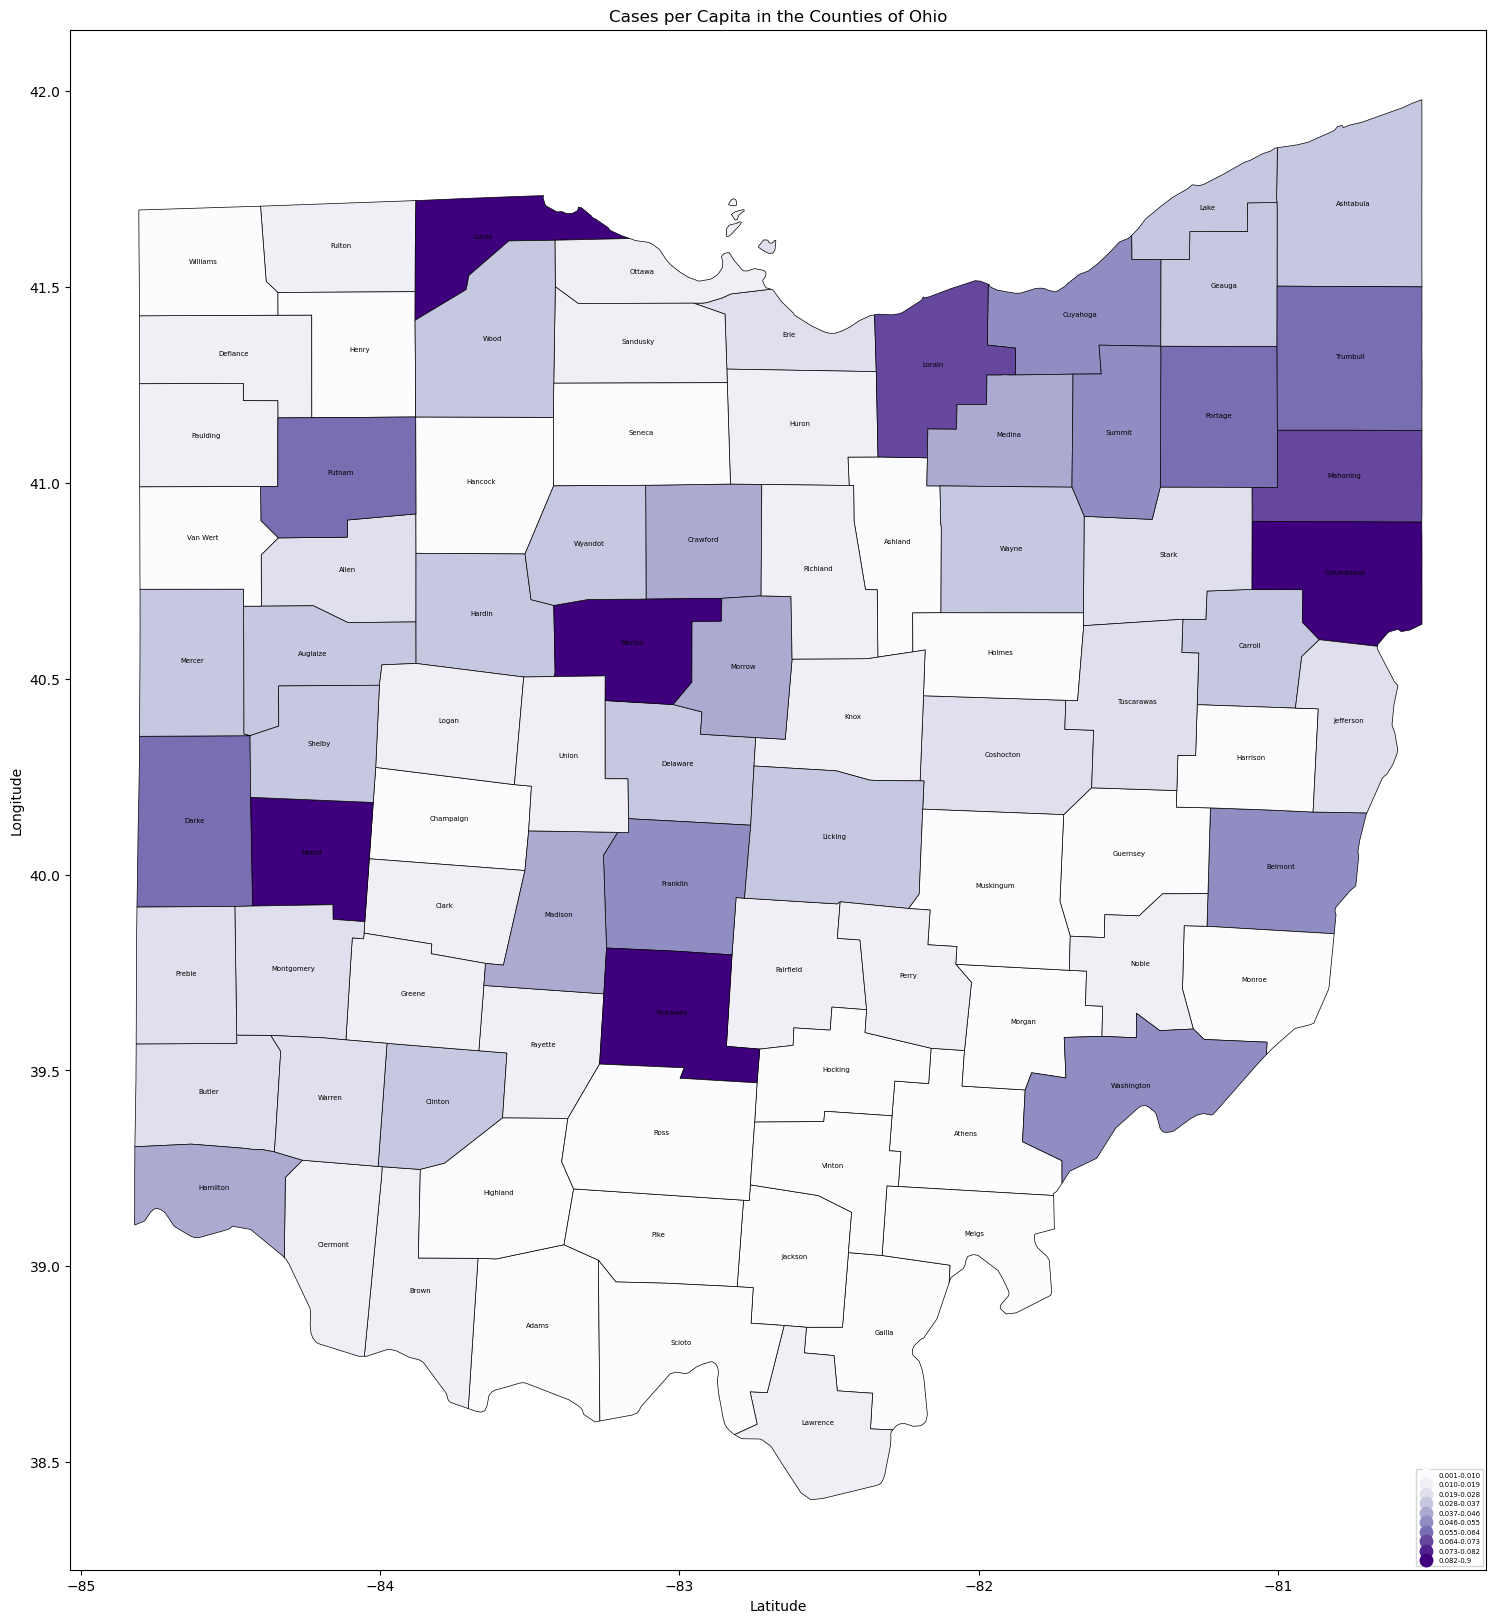

In [226]:
merged_data_cases_sorted['case_bins'] = pd.cut(merged_data_cases_sorted['cases_per_capita'], bins=bins,labels=labels)

# Plot map with colored bins
merged_data_cases_sorted.plot(column='case_bins', linewidth=0.5, edgecolor='black',cmap=colors, legend=True,legend_kwds={'loc': 'lower right','fontsize':5})

# Add county names to the map
for i, j in merged_data_cases_sorted.iterrows():
    plt.annotate(text=j['county'], xy=j['geometry'].centroid.coords[0], horizontalalignment='center', color='black', fontsize=5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Cases per Capita in the Counties of Ohio')
plt.show()


In [227]:
#plotting cases per capita from the merged_data_cases_sorted  df
#merged_data_cases_sorted.plot(column='cases_per_capita', linewidth=0.5, edgecolor='white', legend=True)
#iterating through every row of the merged_data_cases_sorted df to plot the name of the county on the map.
#plt.annotate is used to print the name of the county in the centroid of the county. This is why the centroid attribute of the geometry column is used
#for i, j in merged_data_cases_sorted.iterrows():
 #   plt.annotate(text=j['county'], xy=j['geometry'].centroid.coords[0], horizontalalignment='center', color='white', fontsize=5)
#plt.title('Cases per Capita in the Counties of Ohio')
#plt.xlabel('Latitude')
#plt.ylabel('Longitude')
#plt.show()

# Deaths

In [228]:
#grouping data county wise and summing up the number of deaths of every county
data_deaths_county = data.groupby('county')['deaths'].sum()

In [229]:
#coverting to df
data_deaths_county_df=data_deaths_county.to_frame()

In [230]:
#data[["county","total_pop"]].drop_duplicates(keep="first")

In [231]:
#adding the county and tot_pop columsn to the above df by merging them
data_deaths_county_df=data_deaths_county_df.merge(data[["county","total_pop"]].drop_duplicates(keep="first"),how="inner",on="county")

In [232]:
#calculating deathspercapita
data_deaths_county_df["deaths_per_capita"]=data_deaths_county_df["deaths"]/data_deaths_county_df["total_pop"]

In [233]:
data_deaths_county_df

,county,deaths,total_pop,deaths_per_capita
0,Adams,0,28229,0.000000
1,Allen,126,105196,0.001198
2,Ashland,0,53189,0.000000
3,Ashtabula,81,99777,0.000812
4,Athens,36,64974,0.000554
...,...,...,...,...
83,Washington,99,61351,0.001614
84,Wayne,207,115371,0.001794
85,Williams,9,37386,0.000241
86,Wood,129,128885,0.001001


In [234]:
data_deaths_county_df.to_csv("C:/Users/urvis/Desktop/data_deaths_county_df.csv")

In [235]:
#merging the county data with the df that has the number of deaths per capita , ie data_deaths_county_df
merged_data_deaths=pd.merge(ohio_counties, data_deaths_county_df, on ='county',how='inner')

In [236]:
#sorting the merged df in alphabetical order according to county
merged_data_deaths_sorted=merged_data_deaths.sort_values('county')


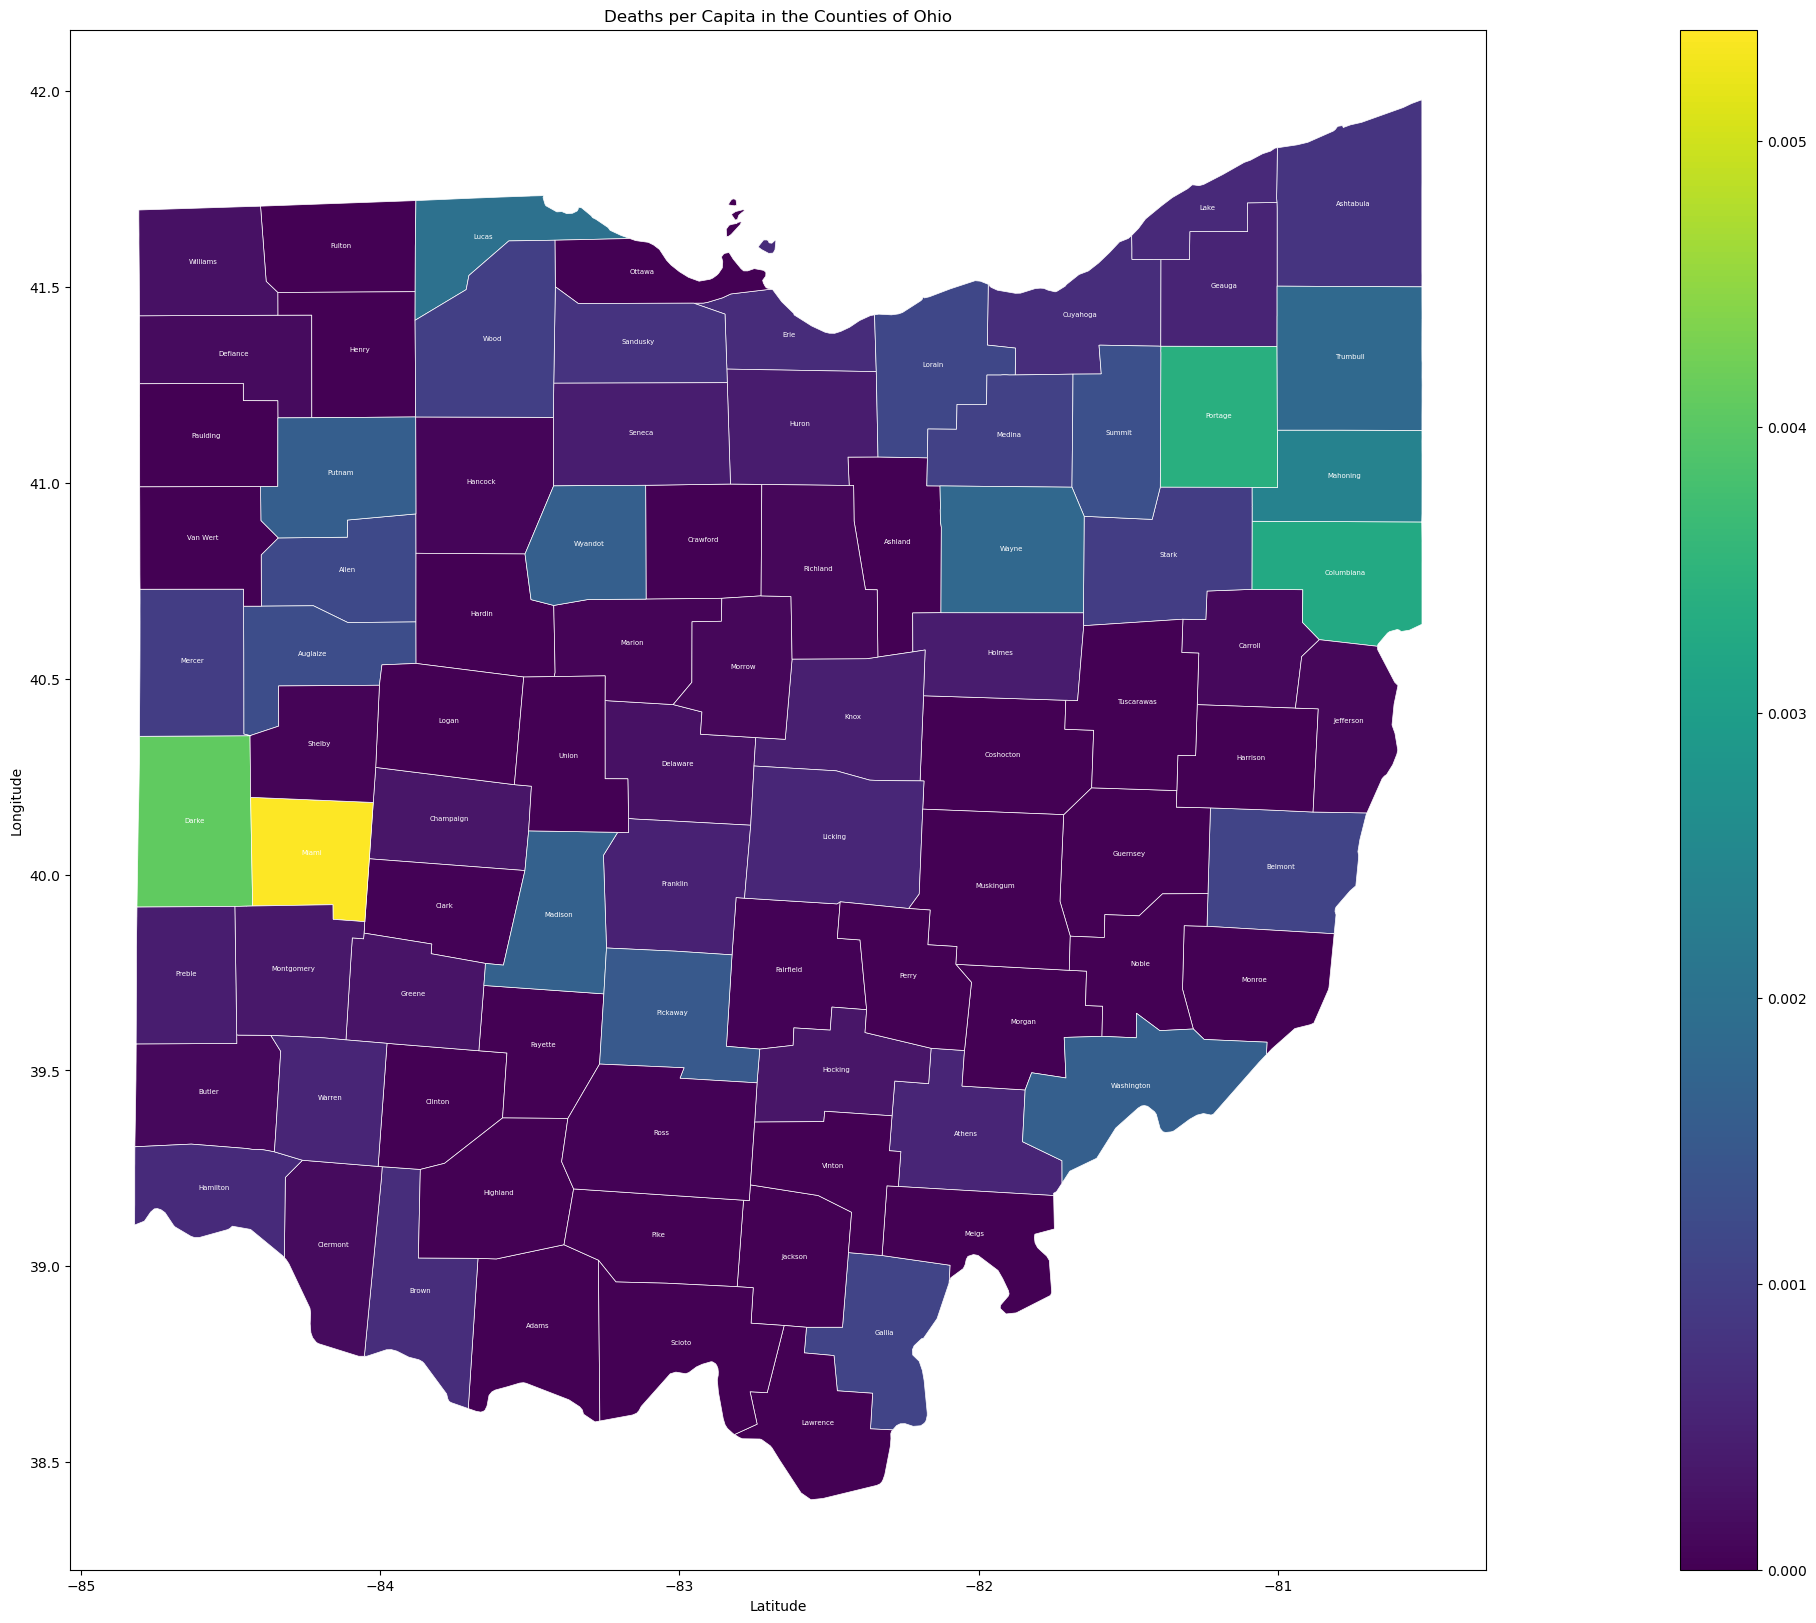

In [237]:
#plotting deaths per capita from the merged_data_deaths_sorted  df
merged_data_deaths_sorted.plot(column='deaths_per_capita', linewidth=0.5, edgecolor='white', legend=True)
#iterating through every row of the merged_data_deaths_sorted df to plot the name of the county on the map.
#plt.annotate is used to print the name of the county in the centroid of the county. This is why the centroid attribute of the geometry column is used
for i, j in merged_data_cases_sorted.iterrows():
    plt.annotate(text=j['county'], xy=j['geometry'].centroid.coords[0], horizontalalignment='center', color='white', fontsize=5)
plt.title('Deaths per Capita in the Counties of Ohio')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# Part 1: e

In [238]:
#extracting columns which are jaccard noramlized using the 'endswith' function
data_awareness_topics_jaccard_normalised=data_awareness_topics.loc[:,data_awareness_topics.columns.str.endswith('_jaccard_normalized')]
data_awareness_topics_jaccard_normalised

,core_jaccard_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,...,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized
0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.005499,0.0,0.021079,0.000000,...,0.000000,0.000000,0.002632,0.010518,0.018491,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.007589,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.016406,0.000000,0.085540,0.000000,0.0,0.0,0.000000
2,0.032428,0.0,0.0,0.002623,0.002544,0.000000,0.007849,0.0,0.000000,0.000000,...,0.000000,0.005979,0.009071,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.033722
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333693,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.006867,0.021430,0.000000,0.004465,0.0,0.000000,0.000000,...,0.000000,0.000000,0.010763,0.000000,0.000000,0.061277,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,0.040149,0.0,0.0,0.003621,0.004167,0.003463,0.001798,0.0,0.001384,0.002305,...,0.011539,0.005198,0.009706,0.025584,0.001343,0.028415,0.002774,0.0,0.0,0.061331
3137,0.000000,0.0,0.0,0.000000,0.141461,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.071506,0.000000,0.0,0.0,0.000000
3138,0.005448,0.0,0.0,0.008745,0.004262,0.000000,0.000543,0.0,0.000000,0.000000,...,0.000000,0.009818,0.002131,0.000000,0.001490,0.010769,0.000000,0.0,0.0,0.005602
3139,0.000000,0.0,0.0,0.000000,0.027492,0.000000,0.010399,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [239]:
#Adding the date_inverted_column to the above created df
data_awareness_topics_jaccard_normalised["day"]=data["date_index_converted"]

In [245]:
#grouping by day and calculating mean of all values
data_awareness_topics_jaccard_normalised_county=data_awareness_topics_jaccard_normalised.groupby(by="day").mean()

In [246]:
#resetting index
data_awareness_topics_jaccard_normalised_county.reset_index(inplace=True)

In [247]:
#extracting just day number from ' day '
data_awareness_topics_jaccard_normalised_county['day_number']=data_awareness_topics_jaccard_normalised_county['day'].str[4:]

In [248]:
#converting day to integer type
data_awareness_topics_jaccard_normalised_county['day_number_int'] = data_awareness_topics_jaccard_normalised_county['day_number'].astype(str).astype(int)

In [249]:
#sorting by day number
data_awareness_topics_jaccard_normalised_county_sorted=data_awareness_topics_jaccard_normalised_county.sort_values(by='day_number_int', ascending=True)

In [250]:
data_awareness_topics_jaccard_normalised_county_sorted

,day,core_jaccard_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,...,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized,day_number,day_number_int
0,day_1,0.000007,0.000208,0.000000,0.006211,0.010840,0.000426,0.002583,0.004060,0.016869,...,0.003742,0.004655,0.000438,0.005994,0.000333,0.000041,0.000000,0.000663,1,1
31,day_2,0.000000,0.000000,0.000000,0.006109,0.014642,0.000000,0.001323,0.000000,0.003711,...,0.003498,0.000646,0.002933,0.012516,0.000080,0.000000,0.000000,0.000000,2,2
42,day_3,0.000006,0.000000,0.000030,0.006696,0.016295,0.005015,0.001789,0.005286,0.002438,...,0.004590,0.004534,0.000381,0.014457,0.000733,0.004536,0.000000,0.002176,3,3
53,day_4,0.000008,0.000031,0.000000,0.005475,0.038437,0.005502,0.002235,0.000223,0.005051,...,0.004976,0.003193,0.000679,0.023473,0.000257,0.000014,0.000000,0.000025,4,4
64,day_5,0.000000,0.000000,0.000721,0.002926,0.037963,0.011382,0.001961,0.005896,0.007442,...,0.004403,0.004977,0.001508,0.008791,0.001804,0.006810,0.001768,0.000036,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,day_115,0.007430,0.000000,0.000000,0.002639,0.076660,0.001890,0.003026,0.000238,0.003467,...,0.003685,0.004559,0.001898,0.008560,0.002557,0.000000,0.000000,0.005987,115,115
19,day_116,0.006253,0.000000,0.000000,0.000687,0.028453,0.026784,0.000892,0.000166,0.000892,...,0.001839,0.000066,0.000304,0.014504,0.006649,0.000000,0.000000,0.009238,116,116
20,day_117,0.013471,0.004765,0.000000,0.002744,0.012476,0.000915,0.000456,0.038528,0.000300,...,0.003043,0.014588,0.000016,0.014805,0.000000,0.038462,0.000000,0.013318,117,117
21,day_118,0.036287,0.000000,0.000000,0.004496,0.032626,0.000958,0.056151,0.004379,0.000751,...,0.055061,0.000237,0.000362,0.019509,0.000099,0.000000,0.000000,0.034830,118,118


In [251]:
#dropping columns
data_awareness_topics_jaccard_normalised_county_sorted=data_awareness_topics_jaccard_normalised_county_sorted.drop(columns=['day','day_number'])

In [252]:
data_awareness_topics_jaccard_normalised_county_sorted

,core_jaccard_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,...,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized,day_number_int
0,0.000007,0.000208,0.000000,0.006211,0.010840,0.000426,0.002583,0.004060,0.016869,0.001186,...,0.007803,0.003742,0.004655,0.000438,0.005994,0.000333,0.000041,0.000000,0.000663,1
31,0.000000,0.000000,0.000000,0.006109,0.014642,0.000000,0.001323,0.000000,0.003711,0.000116,...,0.006526,0.003498,0.000646,0.002933,0.012516,0.000080,0.000000,0.000000,0.000000,2
42,0.000006,0.000000,0.000030,0.006696,0.016295,0.005015,0.001789,0.005286,0.002438,0.001653,...,0.002727,0.004590,0.004534,0.000381,0.014457,0.000733,0.004536,0.000000,0.002176,3
53,0.000008,0.000031,0.000000,0.005475,0.038437,0.005502,0.002235,0.000223,0.005051,0.000539,...,0.006316,0.004976,0.003193,0.000679,0.023473,0.000257,0.000014,0.000000,0.000025,4
64,0.000000,0.000000,0.000721,0.002926,0.037963,0.011382,0.001961,0.005896,0.007442,0.000817,...,0.017044,0.004403,0.004977,0.001508,0.008791,0.001804,0.006810,0.001768,0.000036,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.007430,0.000000,0.000000,0.002639,0.076660,0.001890,0.003026,0.000238,0.003467,0.000739,...,0.000956,0.003685,0.004559,0.001898,0.008560,0.002557,0.000000,0.000000,0.005987,115
19,0.006253,0.000000,0.000000,0.000687,0.028453,0.026784,0.000892,0.000166,0.000892,0.000309,...,0.004455,0.001839,0.000066,0.000304,0.014504,0.006649,0.000000,0.000000,0.009238,116
20,0.013471,0.004765,0.000000,0.002744,0.012476,0.000915,0.000456,0.038528,0.000300,0.001820,...,0.005835,0.003043,0.014588,0.000016,0.014805,0.000000,0.038462,0.000000,0.013318,117
21,0.036287,0.000000,0.000000,0.004496,0.032626,0.000958,0.056151,0.004379,0.000751,0.052812,...,0.013728,0.055061,0.000237,0.000362,0.019509,0.000099,0.000000,0.000000,0.034830,118


In [253]:
#creating df with just the values that have to be plotted
data_awareness_topics_jaccard_normalised_county_sorted_values=data_awareness_topics_jaccard_normalised_county_sorted.drop(columns=['day_number_int'])

In [254]:
data_awareness_topics_jaccard_normalised_county_sorted_values

,core_jaccard_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,...,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized
0,0.000007,0.000208,0.000000,0.006211,0.010840,0.000426,0.002583,0.004060,0.016869,0.001186,...,0.000573,0.007803,0.003742,0.004655,0.000438,0.005994,0.000333,0.000041,0.000000,0.000663
31,0.000000,0.000000,0.000000,0.006109,0.014642,0.000000,0.001323,0.000000,0.003711,0.000116,...,0.000000,0.006526,0.003498,0.000646,0.002933,0.012516,0.000080,0.000000,0.000000,0.000000
42,0.000006,0.000000,0.000030,0.006696,0.016295,0.005015,0.001789,0.005286,0.002438,0.001653,...,0.000860,0.002727,0.004590,0.004534,0.000381,0.014457,0.000733,0.004536,0.000000,0.002176
53,0.000008,0.000031,0.000000,0.005475,0.038437,0.005502,0.002235,0.000223,0.005051,0.000539,...,0.000865,0.006316,0.004976,0.003193,0.000679,0.023473,0.000257,0.000014,0.000000,0.000025
64,0.000000,0.000000,0.000721,0.002926,0.037963,0.011382,0.001961,0.005896,0.007442,0.000817,...,0.000131,0.017044,0.004403,0.004977,0.001508,0.008791,0.001804,0.006810,0.001768,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.007430,0.000000,0.000000,0.002639,0.076660,0.001890,0.003026,0.000238,0.003467,0.000739,...,0.005977,0.000956,0.003685,0.004559,0.001898,0.008560,0.002557,0.000000,0.000000,0.005987
19,0.006253,0.000000,0.000000,0.000687,0.028453,0.026784,0.000892,0.000166,0.000892,0.000309,...,0.000236,0.004455,0.001839,0.000066,0.000304,0.014504,0.006649,0.000000,0.000000,0.009238
20,0.013471,0.004765,0.000000,0.002744,0.012476,0.000915,0.000456,0.038528,0.000300,0.001820,...,0.000403,0.005835,0.003043,0.014588,0.000016,0.014805,0.000000,0.038462,0.000000,0.013318
21,0.036287,0.000000,0.000000,0.004496,0.032626,0.000958,0.056151,0.004379,0.000751,0.052812,...,0.000220,0.013728,0.055061,0.000237,0.000362,0.019509,0.000099,0.000000,0.000000,0.034830


In [255]:
data_awareness_topics_jaccard_normalised_county_sorted_values.columns

Index(['core_jaccard_normalized', 'ideology_jaccard_normalized',
       'race_jaccard_normalized', 'economy_jaccard_normalized',
       'sports_jaccard_normalized', 'foreign_jaccard_normalized',
       'domestic_jaccard_normalized', 'nationalistic_jaccard_normalized',
       'politics_democratic_love_jaccard_normalized',
       'health_technology_jaccard_normalized', 'education_jaccard_normalized',
       'gender_jaccard_normalized', 'religion_jaccard_normalized',
       'social_jaccard_normalized',
       'politics_republican_love_jaccard_normalized',
       'politics_jaccard_normalized', 'entertainment_jaccard_normalized',
       'politics_republican_hate_jaccard_normalized',
       'politics_democratic_hate_jaccard_normalized',
       'health_jaccard_normalized', 'illness_jaccard_normalized'],
      dtype='object')

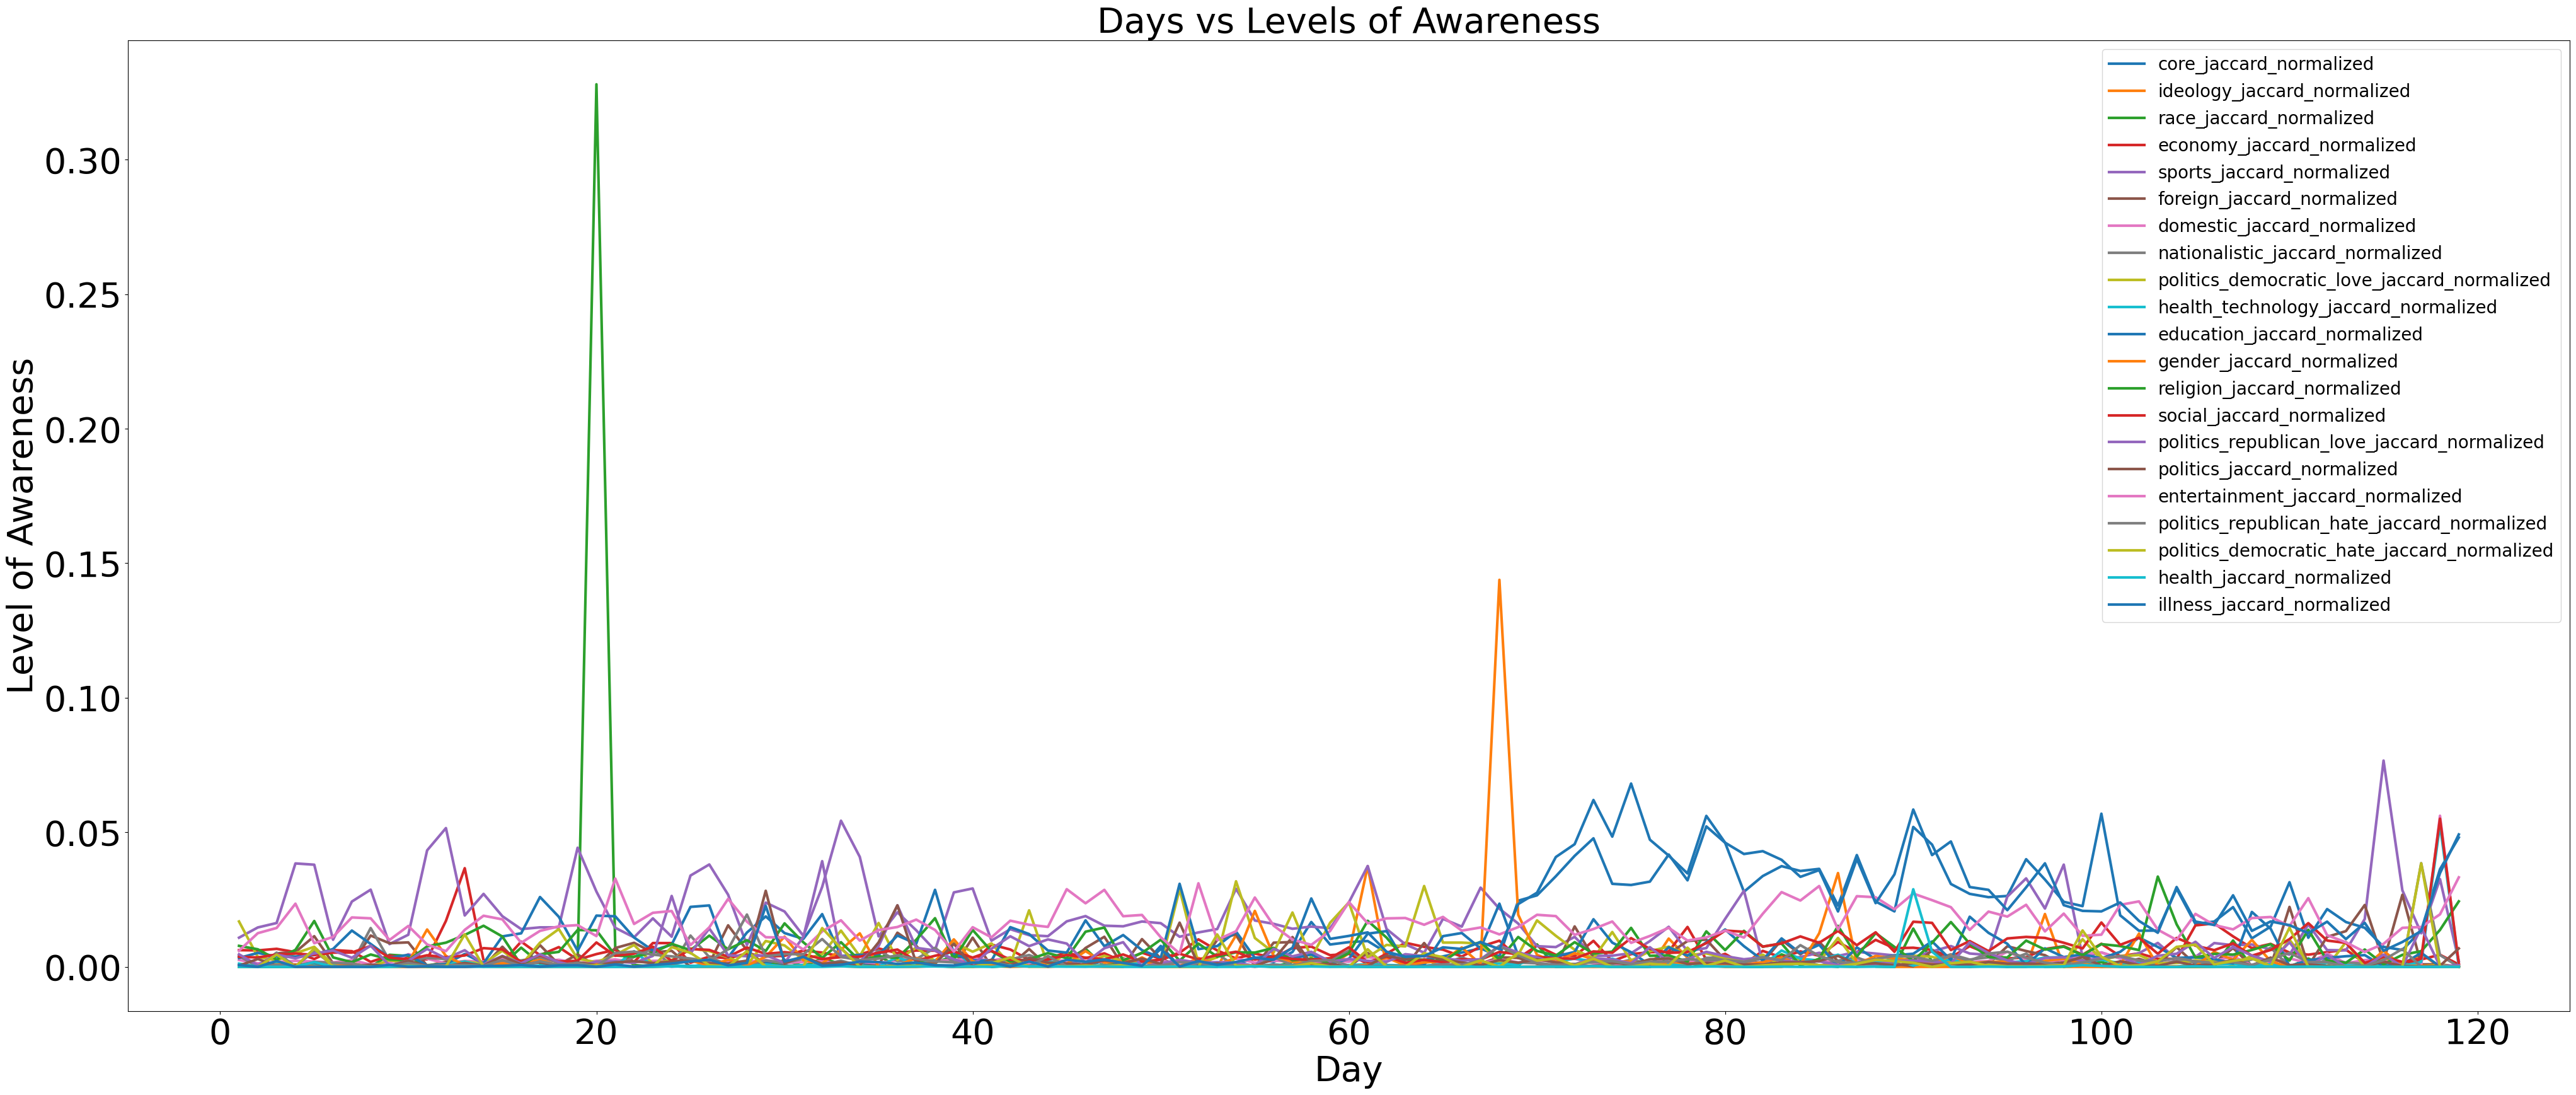

In [257]:
#setting x to plot the day number 
x_axis= data_awareness_topics_jaccard_normalised_county_sorted['day_number_int']
#interating through all the columns in the data_awareness_topics_jaccard_normalised_county_sorted_values df 
for columns in data_awareness_topics_jaccard_normalised_county_sorted_values.columns:
    y_axis = data_awareness_topics_jaccard_normalised_county_sorted_values[columns]    
    plt.plot(x_axis, y_axis, label = columns,linewidth=3)

plt.rcParams["figure.figsize"] = [50,20] 
plt.title('Days vs Levels of Awareness',fontsize=40)
plt.xlabel('Day',fontsize=40)
plt.ylabel('Level of Awareness',fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(fontsize=20)
plt.show()

<h1><center><font color=blue>Introduction to Statistical Machine Learning</font></center></h1>
<h1><center><font color=black>Part II: Model Creation and Prediction</font></center></h1>
<h1><center><font color=black>By: Tanvi Shroff & Ayush Singla</font></center></h1>

In [1]:
# Importing useful libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
# Reading train data
data_train=pd.read_csv("C:/Users/adity/Downloads/training_data.csv")

In [3]:
# Reading test data
data_test=pd.read_csv("C:/Users/adity/Downloads/test_data.csv")

In [4]:
#Cheking shape of train data
data_train.shape

(3141, 144)

In [5]:
#Cheking shape of test data
data_test.shape

(7331, 145)

In [6]:
#Dropping 'cases' column from train
x_train=data_train.drop(columns=["cases"])

In [7]:
#Checking correlation 'cases' column from train
x_train['ideology_jaccard_normalized'].corr(x_train['ideology_intersection_normalized'])

0.9679590303073405

In [8]:
#Adding 'cases' column to ytrain
y_train=data_train['cases']
#y_train.head(2)

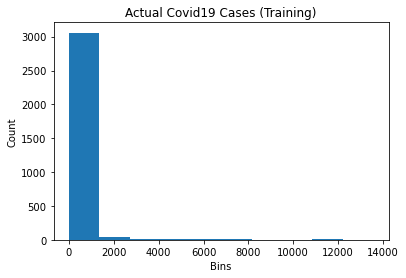

In [9]:
#Graph to show actual covid19 cases in train
plt.hist(y_train)
plt.title("Actual Covid19 Cases (Training)")
plt.ylabel("Count")
plt.xlabel("Bins")
plt.show()

<i>One hot encoding - County</i>

In [10]:
x_ohe_train = pd.get_dummies(x_train, columns = ['county'])
x_ohe_train.head(2)

,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,...,county_Tuscarawas,county_Union,county_Van Wert,county_Vinton,county_Warren,county_Washington,county_Wayne,county_Williams,county_Wood,county_Wyandot
0,0,day_10,363,0.0,0.0,0.0,0.000011,0.000151,0.000053,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,day_105,256,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


<i>Converting date_index_converted to day_number</i>

In [11]:
x_ohe_train['day_number']=x_ohe_train['date_index_converted'].str[4:]

In [12]:
#Creating numeric day column to be used in model development
x_ohe_train['day_number']=pd.to_numeric(x_ohe_train['day_number'])

In [13]:
# Dropping date_index_converted column
x_drop_train=x_ohe_train.drop(columns=["date_index_converted"])

In [14]:
# Picking only jaccard normalized columns and all county one hot encoded columns
normalized_data=x_drop_train.filter(like="jaccard_normalized", axis=1)
normalized_data=pd.DataFrame(normalized_data)
county_data=x_drop_train.filter(like="county", axis=1)
county_data=pd.DataFrame(county_data)

In [15]:
# Picking the required columns and creating new 'death_percap' column
# Deaths and Total_pop columns are dropped
abc=x_drop_train[['deaths','total_pop','day_number',
                             'percent_highschool',
'poverty_rate','percent_25_34',"median_property_value","percent_married"]]
abc['death_percap']=(abc['deaths']/abc['total_pop'])
#abc['beds/hospitals']=abc['beds']/abc['hospitals']
abc=abc.drop(columns=["deaths","total_pop"])
              
# Normalization on selected county level variables
normalized_df=(abc-abc.min())/(abc.max()-abc.min())

C:\Users\adity\AppData\Local\Temp\ipykernel_76096\2278958828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc['death_percap']=(abc['deaths']/abc['total_pop'])


In [16]:
# Picking the final variables using insights gained from correlation matrix and feature importance values post model training
xtrain_v1=pd.concat([normalized_data[['social_jaccard_normalized',
                                     'health_technology_jaccard_normalized',
                                     'gender_jaccard_normalized']],
                     x_drop_train[["percent_white"]],abc],axis=1)

In [17]:
# Averaging core jaccard and illness jaccard since they have a correlation of 0.78 and creating new column
xtrain_v1['core_illness']=(normalized_data['core_jaccard_normalized']+normalized_data['illness_jaccard_normalized'])/2

In [18]:
#Checking shape of final training set
xtrain_v1.shape

(3141, 12)

<i>Preparing test data</i>

In [19]:
#Checking top 2 rows of test data set
data_test.head(2)

,index,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,0,Carroll,0,0,day_22,40,0.000000,0.000000,0.000000,0.000106,...,58.2,4.7,713,47075,26589,88.5,56.9,14.8,116700,0.974052
1,1,Richland,3,3,day_118,17,0.000661,0.002567,0.058824,0.000494,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085


In [20]:
# Dropping index column from test data
x_test=data_test.drop(columns=["index"])

In [21]:
#One hot encoding of county column in test data as we did in training data
x_ohe_test = pd.get_dummies(x_test, columns = ['county'])
x_ohe_test.head(2)

,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,...,county_Tuscarawas,county_Union,county_Van Wert,county_Vinton,county_Warren,county_Washington,county_Wayne,county_Williams,county_Wood,county_Wyandot
0,0,0,day_22,40,0.000000,0.000000,0.000000,0.000106,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3,3,day_118,17,0.000661,0.002567,0.058824,0.000494,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Converting date_index_converted to day_number
x_ohe_test['day_number']=x_ohe_test['date_index_converted'].str[4:]

In [23]:
#Creating numeric day column to be used in model development
x_ohe_test['day_number']=pd.to_numeric(x_ohe_test['day_number'])

In [26]:
#Creating min value of day_number
min(x_ohe_test['day_number'])

1

In [27]:
#Dropping date_index_converted column
x_drop_test=x_ohe_test.drop(columns=["date_index_converted"])

In [28]:
# Picking only jaccard normalized columns and all county one hot encoded columns
normalized_data=x_drop_test.filter(like="jaccard_normalized", axis=1)
normalized_data=pd.DataFrame(normalized_data)
county_data=x_drop_test.filter(like="county", axis=1)
county_data=pd.DataFrame(county_data)

In [29]:
# Picking the required columns and creating new 'death_percap' column
# Deaths and Total_pop columns are dropped
abc=x_drop_test[['deaths','total_pop','day_number',
                             'percent_highschool',
'poverty_rate','percent_25_34',"median_property_value","percent_married"]]
abc['death_percap']=abc['deaths']/abc['total_pop']
#abc['beds/hospitals']=abc['beds']/abc['hospitals']
abc=abc.drop(columns=["deaths","total_pop"])

# Normalization on selected county level variables              
normalized_df=(abc-abc.min())/(abc.max()-abc.min())

C:\Users\adity\AppData\Local\Temp\ipykernel_76096\779504826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc['death_percap']=abc['deaths']/abc['total_pop']


In [30]:
# Picking the final variables using insights gained from correlation matrix and feature importance values 
#post model training

xtest_v1=pd.concat([normalized_data[['social_jaccard_normalized','health_technology_jaccard_normalized',
                                     'gender_jaccard_normalized']],
                     x_drop_test[["percent_white"]],abc],axis=1)

In [31]:
# Averaging core jaccard and illness jaccard since they have a correlation of 0.78 and creating new column
xtest_v1['core_illness']=(normalized_data['core_jaccard_normalized']+normalized_data['illness_jaccard_normalized'])/2

In [32]:
#Checking shape of final test set
xtest_v1.shape

(7331, 12)

In [33]:
#Checking top 2 rows of final training set
xtest_v1.head(2)

,social_jaccard_normalized,health_technology_jaccard_normalized,gender_jaccard_normalized,percent_white,day_number,percent_highschool,poverty_rate,percent_25_34,median_property_value,percent_married,death_percap,core_illness
0,0.024894,0.000000,0.0,0.974052,22,88.2,14.8,9.7,116700,56.9,0.000000,0.000000
1,0.116164,0.116615,0.0,0.868085,118,86.9,15.6,12.1,103700,48.3,0.000025,0.290306


In [1256]:
# PCA on the final training and test set. This resulted in undesired predicted values and therefore no PCA was done
pca = PCA(n_components = 2)
 
x_train_pca = pca.fit_transform(xtrain_v1)
x_test_pca = pca.fit_transform(xtest_v1)
#x_test = pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

<i>From here on, we are trying different models to identify the best regression model using feature importances and correlation matrix</i>

In [1894]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Creating regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fitting the regressor with xtrain and ytrain
regressor.fit(xtrain_v1, y_train)


RandomForestRegressor(random_state=0)

In [1933]:
# Fitting Random Forest Regression to the dataset
# import the regressor using poly kernel since we have polynomial trend in cases
# Random forest gave very good results but XGBoost gave the best results and therefore, was selected (will cover later)
from sklearn.svm import SVR
regressor = SVR(kernel='poly',degree=3)
regressor.fit(xtrain_v1, y_train)
#5 Predicting a new result
y_pred = regressor.predict(xtest_v1)
y_pred

array([0.09973886, 0.10022406, 0.09999915, ..., 0.09982145, 0.10022636,
       0.09998992])

In [1934]:
# Checking max predicted value given by SVM. Clearly not right hence eliminated
max(y_pred)

0.10235732890737045

In [1861]:
# Fitting Polynomial Regression to the dataset
# import the regressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(xtrain_v1)

#fitting model
model = LinearRegression()
model.fit(x_poly, y_train)

#creating polynomial features and predicting values. This gave higher than expected values and hence, elimnated
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(xtest_v1)
ypred=model.predict(x_poly)
ypred

array([-514.07619779, 7524.2961196 , -109.33484948, ...,  116.95193677,
        660.50371733, -414.95265634])

In [2189]:
# Fitting Lasso Regression to the dataset
# import the regressor
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)

In [1860]:
#Fitting the model and predicting values. This gave higher than expected values and hence, elimnated
model.fit(xtrain_v1, y_train)
y_pred=model.predict(xtest_v1)
y_pred

array([-360.41249325,  752.96909381,  157.44142568, ..., -116.20318873,
        453.30553636,  361.21399233])

In [1616]:
# Weighted Average of three models - RF, Decision Tree and XGBoost
# import the regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import xgboost as xg

model1 = DecisionTreeRegressor()
model2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
model3 = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

#Fitting and predicting
model1.fit(xtrain_v1,y_train)
model2.fit(xtrain_v1,y_train)
model3.fit(xtrain_v1,y_train)

pred1=model1.predict(xtest_v1)
pred2=model2.predict(xtest_v1)
pred3=model3.predict(xtest_v1)

# Results were not better than what RF and XGBoost alone gave hence, eliminated
#avgpred=(pred1*0.3+pred2*0.4+pred3*0.3)
#avgpred
print(pred1*0.+pred2*0.5)
print(pred2)
#print(pred3)

[20:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[1.01220e+02 6.44105e+02 0.00000e+00 ... 2.80000e-01 5.93803e+02
 3.15000e+00]
[9.04400e+01 8.33210e+02 0.00000e+00 ... 5.60000e-01 7.11606e+02
 6.30000e+00]


In [35]:
# Fitting Bagging Regressor to the dataset
# import the regressor
from sklearn.ensemble import BaggingRegressor

In [36]:
model = BaggingRegressor()

In [37]:
#Fitting and predicting
# Did not gave good results hence, eliminated
model.fit(xtrain_v1, y_train)
ypred=model.predict(xtest_v1)
print(ypred)
print(ypred[0:20])
print(ypred[34])

[   0.  1575.     0.  ...    0.   674.8    0. ]
[0.000e+00 1.575e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.400e+00 0.000e+00 9.800e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 2.240e+01 1.267e+02 2.128e+02]
11356.1


In [ ]:
# Fitting RANSAC Regressor to the dataset
# import the regressor
from sklearn.linear_model import RANSACRegressor
reg = RANSACRegressor(random_state=0)
reg.fit(xtrain_v1, y_train)

In [ ]:
# Predicting
# Did not gave good results hence, eliminated
ypred=reg.predict(xtest_v1)
ypred

Text(0.5, 0, 'Feature Importance')

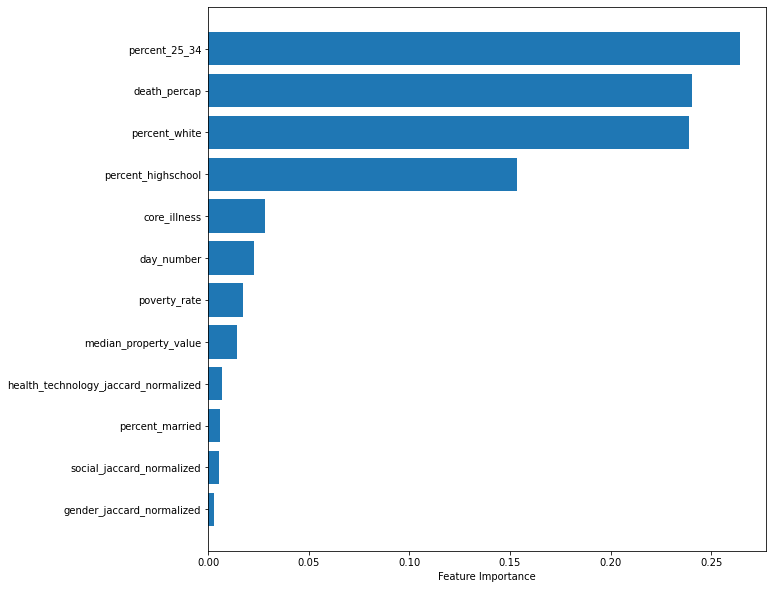

In [53]:
#Checking feature importance for each model to understand which feature is important (Using xgboost)
plt_1 = plt.figure(figsize=(10, 10))
sort = xgb_r.feature_importances_.argsort()
plt.barh(xtrain_v1.columns[sort], xgb_r.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [56]:
# Creating dataframe to understand the feature importance results better. Here we are using xgboost model features as
#that is the one we are using for our final submission
feature_imp=pd.DataFrame(columns=['Feature','Importance'])
feature_imp['Feature']=xtrain_v1.columns[sort].tolist()
feature_imp['Importance']=xgb_r.feature_importances_[sort]

In [57]:
feature_imp

,Feature,Importance
0,gender_jaccard_normalized,0.002748
1,social_jaccard_normalized,0.005543
2,percent_married,0.005646
3,health_technology_jaccard_normalized,0.006950
4,median_property_value,0.014123
5,poverty_rate,0.017249
6,day_number,0.022582
7,core_illness,0.028417
8,percent_highschool,0.153470
9,percent_white,0.238750


In [59]:
# Adding ytrain to check correlation of cases vs other features
corr_df=xtrain_v1
corr_df['cases']=y_train
corr_df.head(2)


,social_jaccard_normalized,health_technology_jaccard_normalized,gender_jaccard_normalized,percent_white,day_number,percent_highschool,poverty_rate,percent_25_34,median_property_value,percent_married,death_percap,core_illness,cases
0,0.002632,0.0,0.0,0.868085,10,86.9,15.6,12.1,103700,48.3,0.0,0.0,0
1,0.000000,0.0,0.0,0.954027,105,85.9,18.6,11.8,101500,49.3,0.0,0.0,119


<AxesSubplot:>

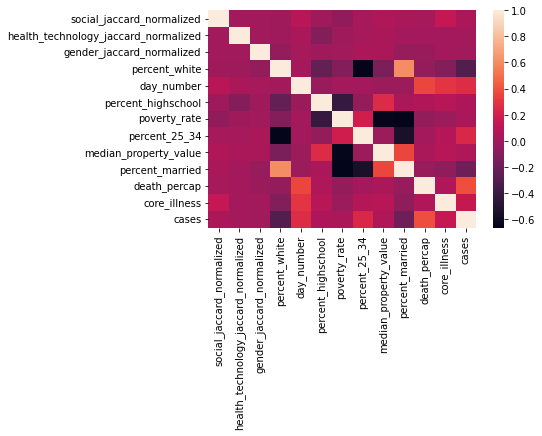

In [60]:
# Correlation matrix on final features selected
import seaborn as sns
corr = corr_df.corr()
sns.heatmap(corr)

In [38]:
# Fitting XGBoost Regressor to the dataset. This is used for the final submission.
# import the regressor
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100)
xgb_r.fit(xtrain_v1, y_train)

[21:15:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [40]:
# Checking MAE for XGBoost model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Using cross validation to get mean absolute error which is pretty low
scores = cross_val_score(xgb_r, xtrain_v1, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = abs(scores)
print('Mean MAE:',(scores.mean()) )

Mean MAE: 38.995093253463786


In [61]:
# Predicting final covid19 predicted values for submission
y_pred=xgb_r.predict(xtest_v1)
print(y_pred[34])
print(y_pred)

12577.58
[ 1.5530951e+00  5.4833752e+02 -4.8941469e-01 ...  3.8068756e-01
  7.1746423e+02 -2.2560165e+00]


<i>Creating final submission file</i>

In [48]:
sample=pd.read_csv('C:/Users/adity/Downloads/sample_submission.csv')
submit=pd.DataFrame()
submit['pred']=y_pred
submit['index']=sample['Index']


In [49]:
submit['pred'][submit['pred'] < 0].count()

2522

In [50]:
submit[0:35]

,pred,index
0,1.553095,0
1,548.337524,1
2,-0.489415,2
3,0.042532,3
4,-4.439125,4
5,0.019279,5
6,-2.775510,6
7,-0.646791,7
8,-0.144867,8
9,0.420406,9


<function matplotlib.pyplot.show(close=None, block=None)>

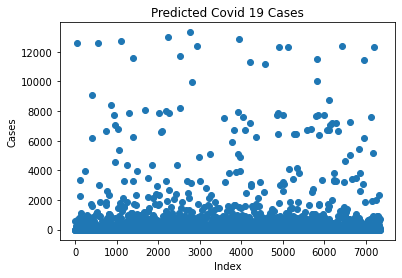

In [51]:
#Plotting predicted values
plt.scatter(submit['index'],submit['pred'])
plt.title("Predicted Covid 19 Cases")
plt.ylabel("Cases")
plt.xlabel("Index")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

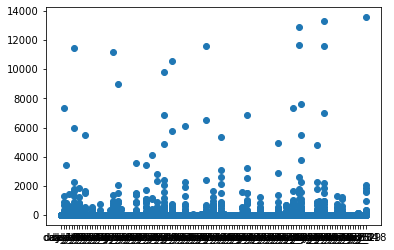

In [52]:
# Plotting train data set covid cases to compare the visuals with predicted values
plt.scatter(data_train['date_index_converted'],data_train['cases'])
plt.show

<b> The R2 Score of this model is 91.927%. </b>

In [2170]:
# Writing file
submit.to_csv("C:/Users/adity/Downloads/submission5.csv")

<h1><center>END</center></h1>